In [26]:
from grale.all_nb import *
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [27]:
paramInfo = pickle.load(open("paraminfo.dat", "rb"))

In [28]:
names = [ x["name"] for x in paramInfo ]
scales = np.array([ x["scalefactor"] for x in paramInfo ]).reshape((1,-1))
samples = np.fromfile("mysamples.dat", dtype=np.float32).reshape((-1,len(names)))

In [29]:
scaledSamples = samples*scales

In [30]:
df = pd.DataFrame(scaledSamples, columns=names)
df["x_0_scaled"] /= ANGLE_ARCSEC
df["y_0_scaled"] /= ANGLE_ARCSEC
df["lens_0,core_scaled"] /= ANGLE_ARCSEC
df["x_1_scaled"] /= ANGLE_ARCSEC
df["y_1_scaled"] /= ANGLE_ARCSEC
df["lens_1,core_scaled"] /= ANGLE_ARCSEC
names

['x_0_scaled',
 'y_0_scaled',
 'angle_0',
 'lens_0,ellipticity',
 'lens_0,sigma_scaled',
 'lens_0,core_scaled',
 'x_1_scaled',
 'y_1_scaled',
 'angle_1',
 'lens_1,ellipticity',
 'lens_1,sigma_scaled',
 'lens_1,core_scaled']

In [83]:
def plotHist(df, colName):
    data = df[colName]
    #mu = np.mean(data)
    #sigma = np.std(data)

    q25, q75 = np.percentile(data, [25, 75]) # More robust
    mu = (q25 + q75) / 2  # center of IQR
    sigma = (q75 - q25) / (2 * 0.6745)

    rnge = [mu-5*sigma,mu+5*sigma]
    plt.hist(data, bins=100, density=True, range=rnge)
    plt.gca().set_xlim(rnge)
    x = np.linspace(*rnge, 1000)
    y = 1/((2*np.pi)**0.5*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
    plt.plot(x, y)
    plt.title(f"{colName}: mu = {mu:.5g}, sigma = {sigma:.5g}")

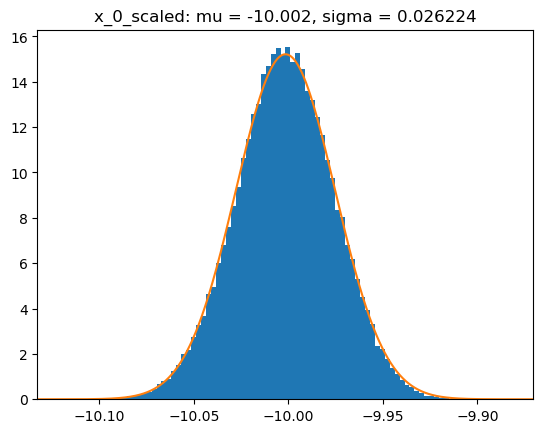

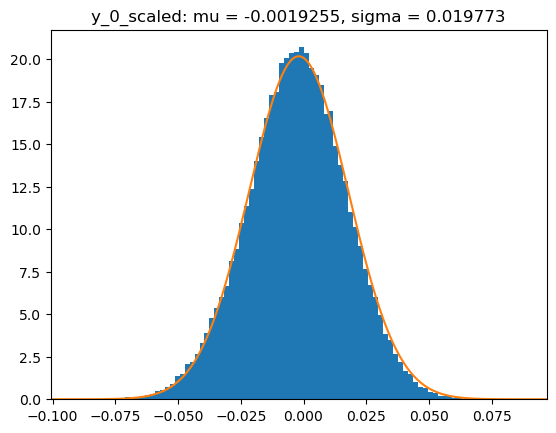

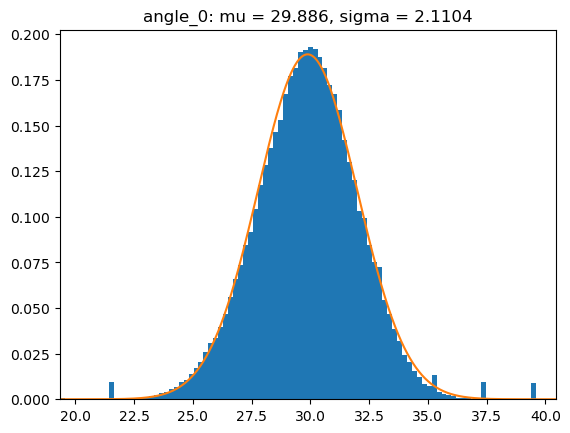

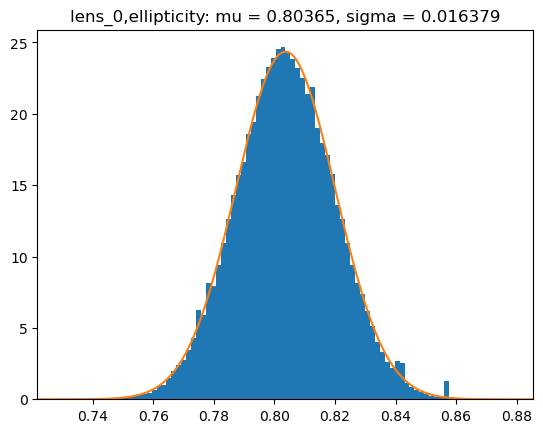

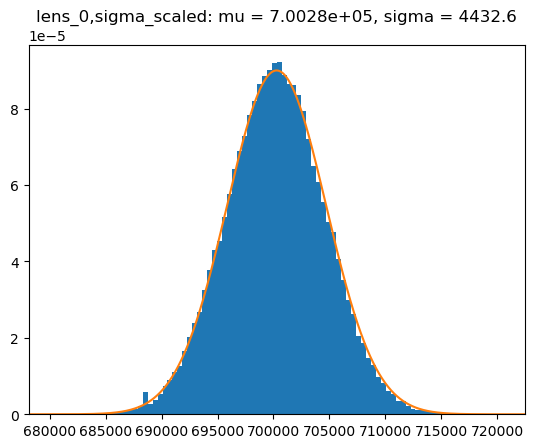

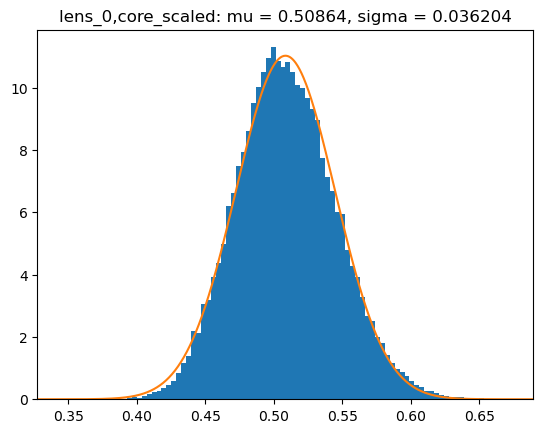

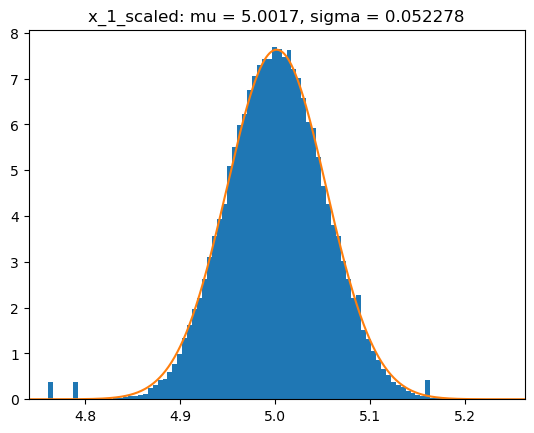

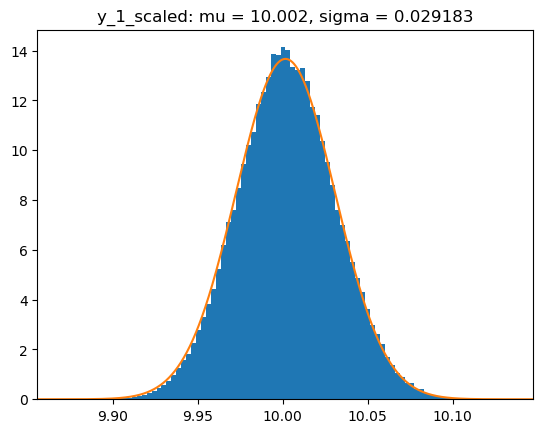

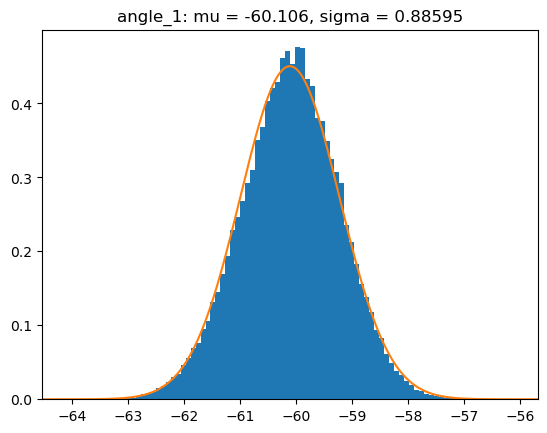

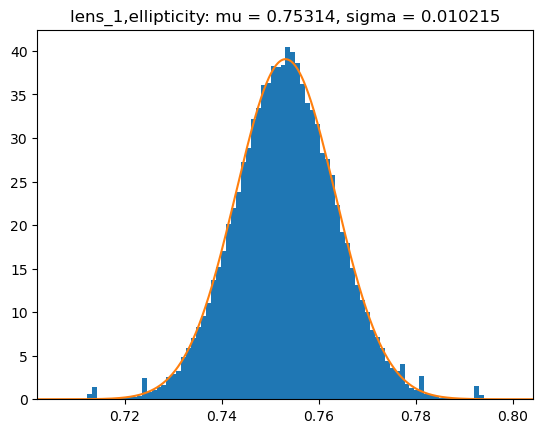

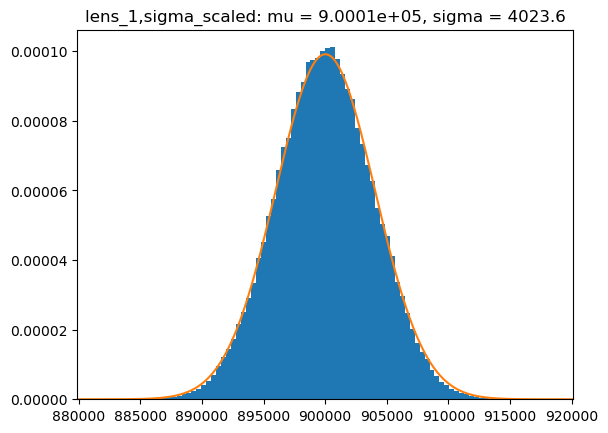

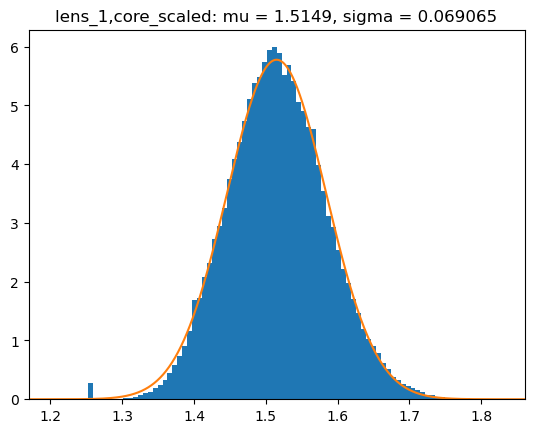

In [85]:
for n in names:
    plt.figure()
    plotHist(df, n)